#**APRENDIZAJE AUTOMÁTICO - MIGUEL MARINES**
##**<u>Campañas Publicitarias en Redes Sociales</u>**
Modelos de Regresión - Curvas de Aprendizaje - Model Tunning para Evitar Overfitting y Underfitting
---
---
Modelos:
* RandomForest - RF
* Extreme Gradient Boost - XGBoost
* Máquina de Vector Soporte - SVM
* Red Neuronal Perceptrón Multicapa - MLP

### **Se trabajará con el archivo "dataset_Facebook.csv" que se encuentra en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que se deberá descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


In [ ]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')


# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/IAyAA"
os.chdir(DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Librerías

# Manejo de datos.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Modelos
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Métricas
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

## **Ejercicio 1**


### **Se describe en qué consiste el método llamado "Curvas de Aprendizaje" (Learning Curves), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Se puede apoyar en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



El método de "Curvas de Aprendizaje" (Learning Curves) es una técnica utilizada en el aprendizaje automático para evaluar el desempeño de un modelo en función del tamaño del conjunto de datos de entrenamiento. Consiste en trazar gráficos que muestran cómo el rendimiento del modelo varía a medida que se incrementa el tamaño del conjunto de datos de entrenamiento.

El proceso es:
1. Entrenamiento con conjuntos de datos de diferentes tamaños.
2. Evaluación del desempeño.
3. Construcción de las curvas de aprendizaje.
4. Interpretación de las curvas de aprendizaje.

      a. Subentrenamiento (Underfitting). Error de entrenamiento y error de validación altos.
      
      b. Sobreentrenamiento (Overfitting). Error de entrenamiento bajo y error de validación alto.
      
      c. Ajuste adecuado (Good fit).  Error de entrenamiento y error de validación bajos.

5. Ajuste del modelo.

Las curvas de aprendizaje son una herramienta importante para comprender el desempeño de un modelo de aprendizaje automático en relación con el tamaño del conjunto de datos de entrenamiento y para identificar problemas como el subentrenamiento o el sobreentrenamiento y poder tomar decisiones informadas para mejorar el rendimiento del modelo.

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., se contestan las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


El objetivo del problema planteado en el artículo "Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach" es utilizar técnicas de minería de datos para predecir métricas de rendimiento en redes sociales y evaluar su impacto en la construcción de marca. El estudio se enfoca en desarrollar un modelo que pueda predecir el rendimiento de una marca en redes sociales utilizando datos minados de estas plataformas, y luego evaluar cómo esos resultados afectan la percepción y construcción de la marca en el contexto digital.


*   **b. Se describe a continuación el significado de cada una de las 8 variables con la cuales se trabajará, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**



*   Page Total Likes: Número de personas a las que les ha gustado la página de la empresa.


*   Type: Tipo de contenido (enlace, foto, estado, vídeo).


*   Category: Categoría del contenido: acción (ofertas especiales y concursos), producto (publicidad directa, contenido explícito de marca), e inspiración (contenido no explícito relacionado con la marca).


*   Post Month: Mes en que se hizo la publicación (enero, febrero, marzo, …, diciembre).


*   Post Weekday: Día en el que se hizo la publicación  (domingo, lunes, …,
sábado).


*   Post Hour: Hora en que se hizo la publicación (0, 1, 2, 3, 4, …, 23).


*   Paid: Si la empresa pagó a Facebook por publicidad (sí, no).


*   Lifetime Post Consumers: El número de personas que hicieron clic en cualquier lugar de la publicación.



In [ ]:
# Carga de datos.
data = pd.read_csv('dataset_Facebook.csv', sep = ';', header = 'infer')

# Separación de los datos de entrada y la variable de salida.
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo se trabajará con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombrar los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Partición en Train, Validation y Test en 60-20-20.
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size = 0.6, shuffle = True, random_state = 5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size = 0.5, shuffle = True, random_state = 7)

# Mostrar resultados.
print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [ ]:
# Datos de entrada.
Xtrain.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [ ]:
# Descripción variables features.
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [ ]:
# Descripción variable objetivo.
ytrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


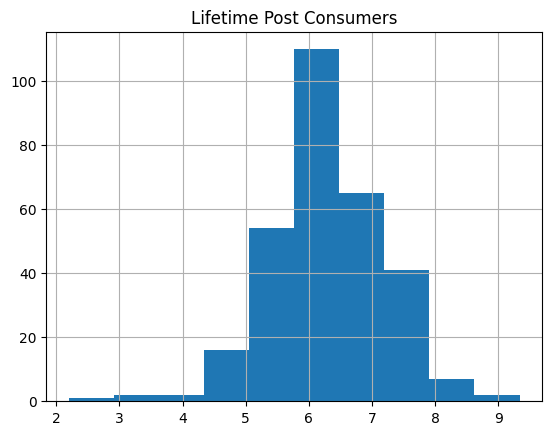

In [ ]:
ytrainlog = np.log(ytrain)   # La variable de salida en un problema de Regresión
ytrainlog.hist();            # se recomienda que esté aproximadamente acampanada,
                             # por lo que se ajustará con el logaritmo natural
                             # como primera aproximación.

In [ ]:
# Se procede de la misma manera con val y test.
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [ ]:
# Se aplica lo mínimo de transformaciones, en particular para datos perdidos.
# Imputación de datos faltantes.

# Variables Numéricas - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Como solo hay una variable numérica, se deja sin escalar.
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy = 'median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Variables Ordinales - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Las variables ordinales se identifican como tales.
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy = 'most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1 ))
                              ])
ord_pipe_nombres = [3, 4, 5]   # ['Post Month', 'Post Weekday', 'Post Hour']


# Variables Nominales - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Las variables nominales se transforman con One-Hot-Encoder.
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop = 'first',
                                                   handle_unknown = 'ignore',
                                                   ))])
nom_pipe_nombres = [1, 2, 6]   # ['Type', 'Category', 'Paid']


# Conjunto de Transformaciones - - - - - - - - - - - - - - - - - - - - - - - - -
# Se conjuntan las transformaciones a aplicar.
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder = 'passthrough')


# Ajuste y Transformación - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Ajuste en Train y transformación en Val y Test.
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [ ]:
# El valor de RMSE (Root-Mean-Square-Error), se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que se
# esté tomando de manera original o con los datos transformados.

# Se muestran ambos valores.
print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


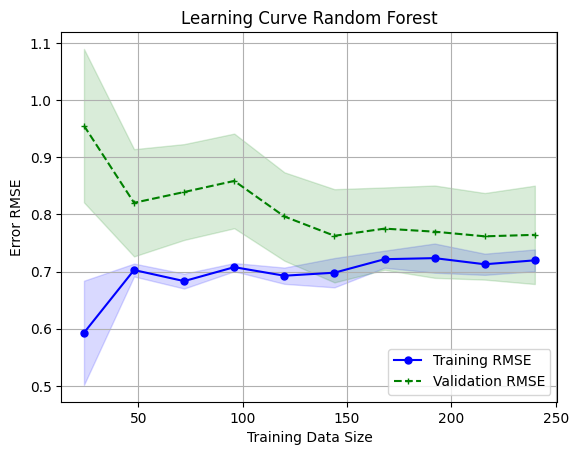

In [ ]:
# Al ejecutar las siguientes líneas de código se determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminados está
# Subentrenado o Sobreentrenado. De ser así, se buscan los valores de sus
# hiperparámetros que se consideran más adecuados para que ya no
# esté sub-o-sobreentrenado.


elmodelo_RF = RandomForestRegressor(max_depth = 2, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 150)


mipipe = Pipeline(steps = [('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator = mipipe,
                                                        X = XtrainT,
                                                        y = np.ravel(ytrainlog),
                                                        cv = 5,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        scoring = 'neg_mean_squared_error',  # Error MSE
                                                        n_jobs = -1)



# Se calculan los promedios y desviación estándar de entrenamiento para RMSE,
# como se tienen los de MSE, se obtiene su raíz cuadrada. El negativo es porque
# sklearn devuelve en realidad el negativo del Error Cuadrático Medio MSE.

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis = 1)
train_std = np.std(rmse_train_scores, axis = 1)
val_mean = np.mean(rmse_val_scores, axis = 1)
val_std = np.std(rmse_val_scores, axis = 1)


plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, val_mean, color = 'green', marker = '+', markersize = 5, linestyle = '--', label = 'Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha = 0.15, color = 'green')

plt.title('Learning Curve Random Forest')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()


In [ ]:
# Una vez verificado que no está sobreentrenado o subentrenado el modelo,
# se pude calcular el RMSE del mejor ajuste con los datos de Prueba.
# Se incluyen los valores de los mejores hiperparámetros encontrados del RandomForest.

# Modelo RandomForest
elmodelo_RF = RandomForestRegressor(max_depth = 2, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 150)

# Entrenamiento y predicciones del modelo.
mipipe = Pipeline(steps = [('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

# Mostrar Resultados.
print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.750


## **Ejercicio 4**

### **Se repite el mismo proceso del Ejercicio 3, anterior, para obtener los hiperparámetros que lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

*   **a. Extreme Gradient Boost XGBoost**

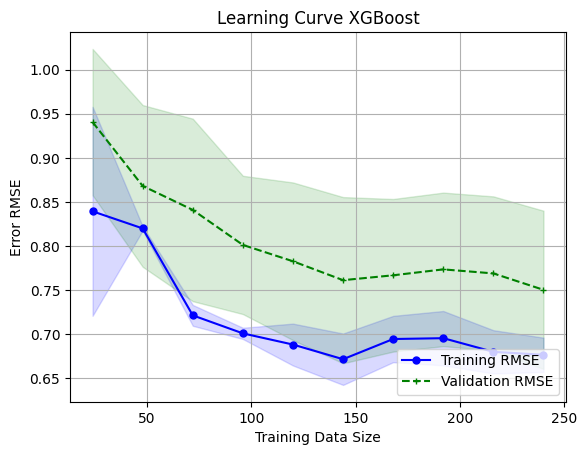

In [ ]:
# Modelo XGBoost.
elmodelo_XGB = XGBRegressor(colsample_bytree = 0.3, gamma = 1.8, learning_rate =  0.1, max_depth = 3, min_child_weight = 5, n_estimators = 100, subsample = 1.0)

# Pipeline con transformaciones y el modelo.
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])

# Curva de aprendizaje.
train_sizes, train_scores, val_scores = learning_curve(estimator = mipipe,
                                                        X = XtrainT,
                                                        y = np.ravel(ytrainlog),
                                                        cv = 5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring = 'neg_mean_squared_error',  # Error MSE
                                                        n_jobs = -1)


# Calcular RMSE.
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis = 1)
train_std = np.std(rmse_train_scores, axis = 1)
val_mean = np.mean(rmse_val_scores, axis = 1)
val_std = np.std(rmse_val_scores, axis = 1)


# Graficar la curva de aprendizaje.
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, val_mean, color = 'green', marker = '+', markersize = 5, linestyle = '--', label = 'Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha = 0.15, color = 'green')

plt.title('Learning Curve XGBoost')
plt.xlabel('Training Data Size')
plt.ylabel("Error RMSE")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Modelo XGBoost.
elmodelo_XGB = XGBRegressor(colsample_bytree = 0.3, gamma = 1.8, learning_rate =  0.1, max_depth = 3, min_child_weight = 5, n_estimators = 100, subsample = 1.0)

# Entrenamiento y predicciones del modelo.
mipipe = Pipeline(steps = [('ct', columnasTransformer), ('m', elmodelo_XGB)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

# Mostrar Resultados.
print('Error RSME(Test) de XGBoost: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de XGBoost: 0.724


*   **b. Máquina de Vector Soporte SVM**

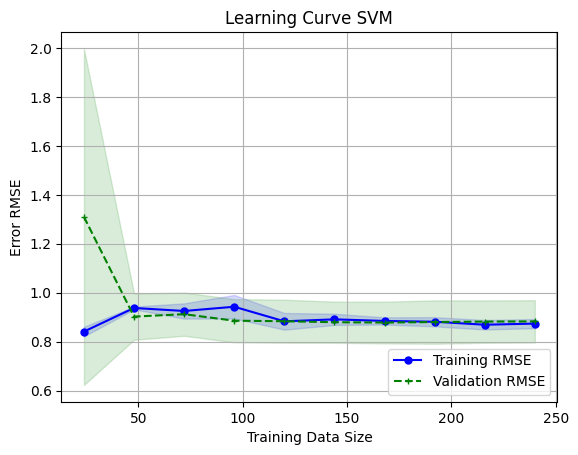

In [ ]:
# Modelo SVR.
elmodelo_SVR = SVR(kernel='rbf', C = 1000.0, epsilon = 1.0)

# Pipeline con transformaciones y el modelo.
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVR)])

# Curva de aprendizaje.
train_sizes, train_scores, val_scores = learning_curve(estimator = mipipe,
                                                        X = XtrainT,
                                                        y = np.ravel(ytrainlog),
                                                        cv = 5,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        scoring = 'neg_mean_squared_error',  # Error MSE
                                                        n_jobs = -1)


# Calcular RMSE.
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis = 1)
train_std = np.std(rmse_train_scores, axis = 1)
val_mean = np.mean(rmse_val_scores, axis = 1)
val_std = np.std(rmse_val_scores, axis = 1)


# Graficar la curva de aprendizaje.
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, val_mean, color = 'green', marker = '+', markersize = 5, linestyle = '--', label = 'Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha = 0.15, color = 'green')

plt.title('Learning Curve SVM')
plt.xlabel('Training Data Size')
plt.ylabel("Error RMSE")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Modelo SVR
elmodelo_SVR = SVR(kernel='rbf', C = 1000.0, epsilon=1.0)

# Entrenamiento y predicciones del modelo.
mipipe = Pipeline(steps = [('ct',columnasTransformer),('m', elmodelo_SVR )])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

# Mostrar Resultados.
print('Error RSME(Test) de SVR: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de SVR: 0.924


*   **c. Red Neuronal Perceptrón Multicapa MLP**

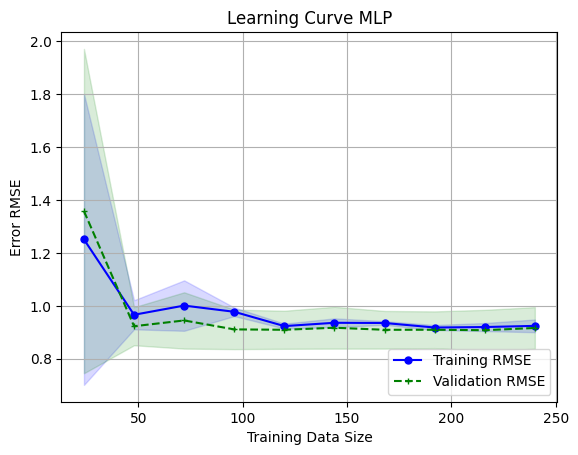

In [ ]:
# Modelo MLP.
elmodelo_MLP = MLPRegressor(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (100,), learning_rate = 'invscaling', solver = 'adam')

# Pipeline con transformaciones y el modelo.
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

# Curva de aprendizaje.
train_sizes, train_scores, val_scores = learning_curve(estimator = mipipe,
                                                        X = XtrainT,
                                                        y = np.ravel(ytrainlog),
                                                        cv = 5,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        scoring = 'neg_mean_squared_error',  # Error MSE
                                                        n_jobs = -1)

# Calcular RMSE.
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

# Graficar la curva de aprendizaje.
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve MLP')
plt.xlabel('Training Data Size')
plt.ylabel("Error RMSE")
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Modelo MLP.
elmodelo_MLP = MLPRegressor(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (100,), learning_rate = 'invscaling', solver = 'adam')

# Entrenamiento y predicciones del modelo.
mipipe = Pipeline(steps = [('ct',columnasTransformer),('m', elmodelo_MLP)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

# Mostrar Resultados.
print('Error RSME(Test) de MLP: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de MLP: 0.914


# **Ejercicio 5**

### **Se incluyen las conclusiones finales de la actividad.**
### **En particular se indica cuál se considera que fue el mejor modelo obtenido.**

Con base en las curvas de aprendizaje graficadas para cada uno de los modelos, se puede concluir que el sesgo es bastante elevado, ya que se aplicaron las diferentes técnicas para reducir el sesgo en los modelos y no se logró obtener un error RSME en Test menor a 0.7. Por otro lado, se puede notar en las curvas de aprendizaje graficadas para cada uno de los modelos que la varianza se puede reducir bastante.


En base al análisis de las diferentes curvas de aprendizaje graficadas para cada uno de los modelos, se llegó a la conclusión de que el mejor modelo es el Random Forest, ya que es el modelo que alcanzó el menor sesgo en su curva de aprendizaje y con una varianza baja. Además, la diferencia entre el error RSME de entrenamiento y validación es aproximadamente del 3% o 0.03 en su mejor punto, lo cual indica que no se está sobreentrenando el modelo.


Adicionalmente, se puede notar en la gráfica de las curvas de aprendizaje que el mejor tamaño para el conjunto de datos de entrenamiento del modelo Random Forest es alrededor de 240 de los 300 registros que se tienen destinados para el entrenamiento. Sin embargo, la gráfica de la curva de aprendizaje solo muestra el tamaño para el conjunto de datos de entrenamiento hasta 250 registros y puede que un mayor tamaño para el conjunto de datos de entrenamiento reduzca todavía más el sesgo y la varianza.